In [1]:
import random
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import numpy as np
import math
import copy
from collections import defaultdict
from timeit import timeit
import time
from genetic_lib import *
from tqdm import tqdm

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

In [2]:
from b_functions import *

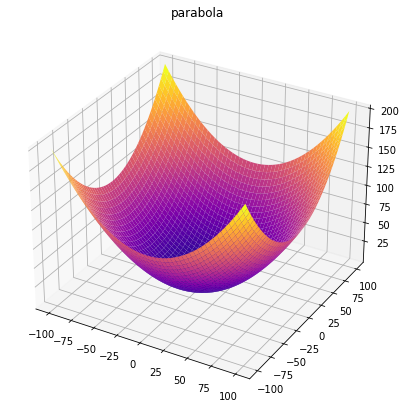

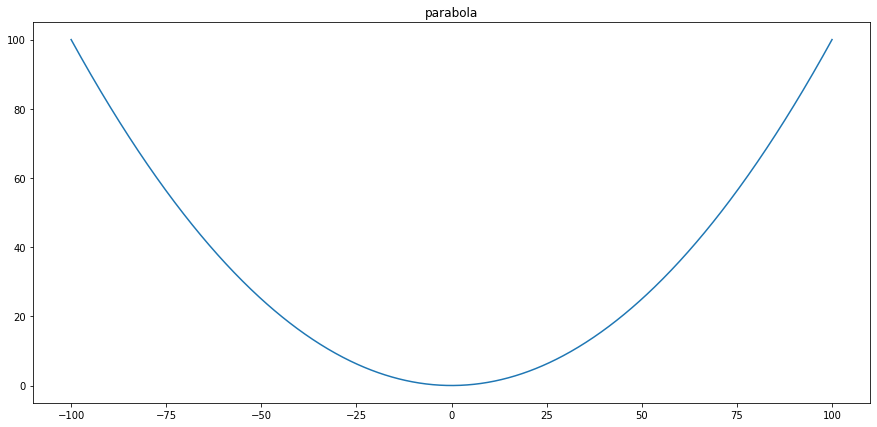

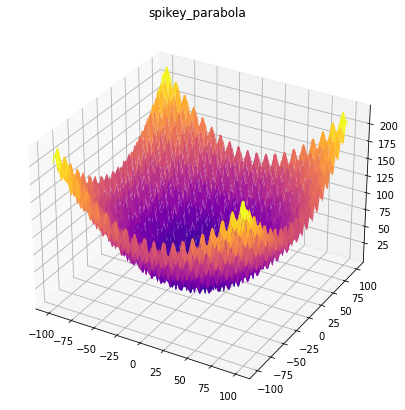

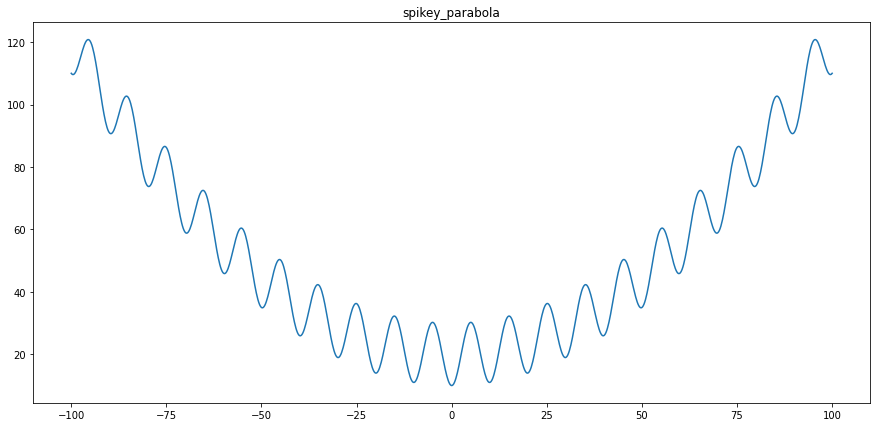

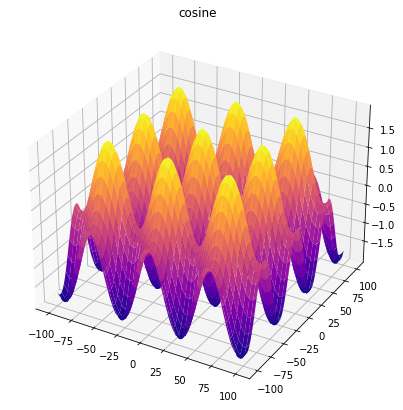

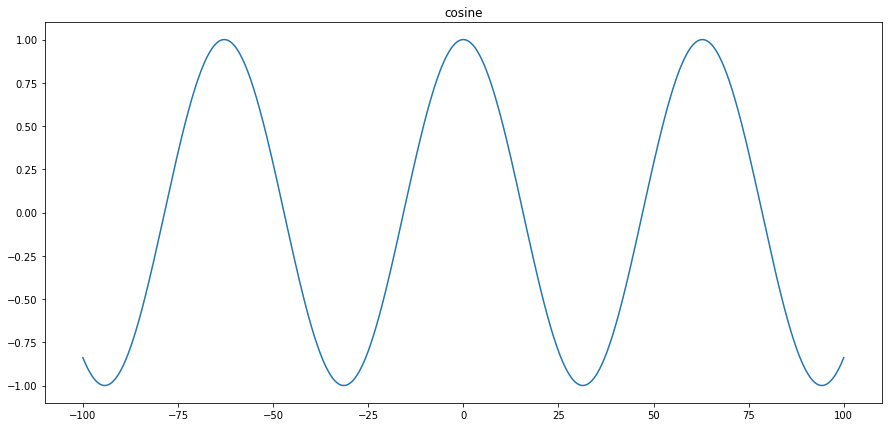

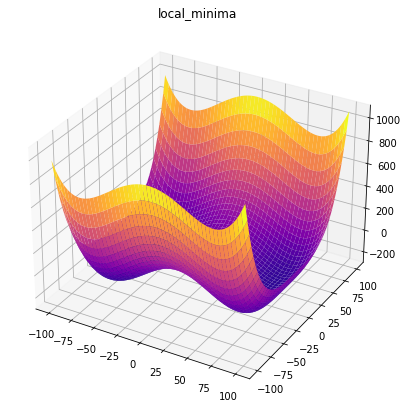

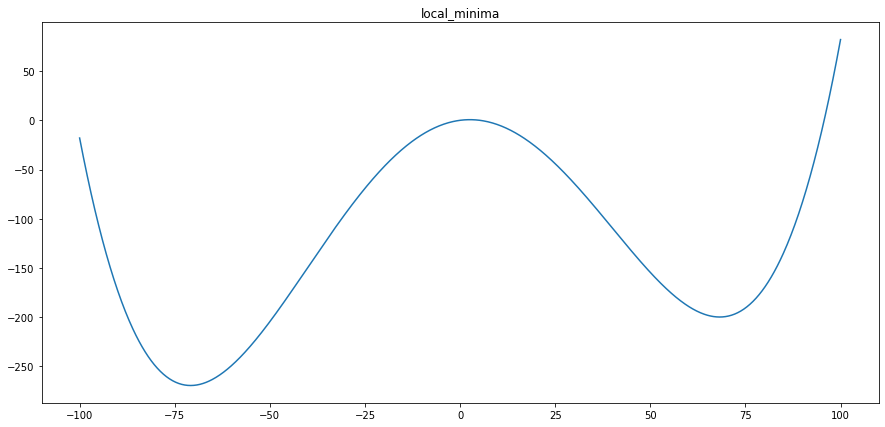

In [3]:
show_all()

## Basic approach

In [3]:
search_range = (-10, 10)
dim = 1
p0_size = 10

population = [[random.uniform(*search_range) for _ in range(dim)] for _ in range(p0_size)]

In [4]:
search_range = (-10, 10)
dim = 1
p0_size = 10
max_generations = 100
sigma = 20
b = 1.01
pop_mean = []
pop_std = []

t0 = time.time()
population = [[random.uniform(*search_range) for _ in range(dim)] for _ in range(p0_size)]
for _ in range(max_generations):
    if len(pop_mean) > 5 and np.mean(pop_mean[-5:]) >= np.mean(pop_mean[-10:-5]):
        break
    keep = 5
    sigma = 1#sigma/b
    num_children = 1
    scored = [(f3(v), v) for v in population ]
    selected = sorted(scored)[:keep]
    pop_mean += [np.mean(population)]
    pop_std += [np.std(population)]
    population = [v for s,v in selected]
    newpop = []
    for p in population:
        newpop += [[random.gauss(0, sigma) +  p[0]] for _ in range(num_children)]
    population += newpop    
t = time.time() - t0
t

NameError: name 'f3' is not defined

In [239]:
def check_convergence(prev_n):
#     if fn([prev_5[0]]) == min(fn(prev_5)):
#     print(prev_n)
    for f in prev_n:
        if f != prev_n[0]:
            return False
    print(prev_n)
    return True
#     if fn([curr]) >= min(fn(prev_5)):
#         return False
#     else:
#         return True

In [130]:
def fixed_population_fixed_std(search_range, dim, p0_size, sigma, fn, max_generations = 100):
    pop_mean = []
    pop_error = []
    pop_std = []
    pop_best = []
    t0 = time.time()
    population = np.array([[random.uniform(*search_range) for _ in range(dim)] for _ in range(p0_size)])
    for _ in range(max_generations):
#         if len(pop_mean) > 10 and np.mean(pop_mean[-5:]) >= np.mean(pop_mean[-10:-5]):
#             break
        if len(pop_mean) > 10 and check_convergence(pop_best[-7:]):
            break
        keep = len(population)//2
        num_children = 1
        scored = [(fn(v), v) for v in population ]
        selected = sorted(scored)[:keep]
        population = np.array([v for s,v in selected])
        
        pop_mean += [np.mean(population[:, 0])]
        pop_std += [np.std(population[:, 0])]
        pop_error += [np.mean(np.abs(population[:, 0]))]
        pop_best += [population[0]]
            
        
        
#         print("selected: ",population.shape)
        newpop = []
        for p in population:
#             print(p)
            newpop += [np.random.normal(scale = sigma, size = p.size) +  p for _ in range(num_children)]
#         print(newpop)
        population = np.concatenate((population, newpop))
#         print("fin: ",population)
    t = time.time() - t0
    return pop_mean, pop_std, pop_error, t

In [184]:

keep_n_geom = lambda pop: max(1, len(pop) //4)

def geom_population_fixed_std(search_range, dim, p0_size, keep_n, sigma, fn, max_generations = 100):
    pop_mean = []
    pop_error = []
    pop_std = []
    pop_best = []
    t0 = time.time()
    population = np.array([[random.uniform(*search_range) for _ in range(dim)] for _ in range(p0_size)])
    for _ in range(max_generations):
        if len(pop_mean) > 10 and check_convergence(pop_best[-7:]):
            break
        if len(population) < 3:
            break

        keep = keep_n(population)
        num_children = 1
        
        scored = [(fn(v), v) for v in population ]
        selected = sorted(scored)[:keep]
        population = np.array([v for s,v in selected])
        
        pop_mean += [np.mean(population[:, 0])]
        pop_std += [np.std(population[:, 0])]
        pop_error += [np.mean(np.abs(population[:, 0]))]
        pop_best += [population[0]]
        
#         print("selected: ",population.shape)
        newpop = []
        for p in population:
#             print(p)
            newpop += [np.random.normal(scale = sigma, size = p.size) +  p for _ in range(num_children)]
#         print(newpop)
        population = np.concatenate((population, newpop))
#         print("fin: ",population)
    t = time.time() - t0
    return pop_mean, pop_std, pop_error, t

In [209]:


keep_n_linear = lambda pop: max(1, (len(pop)-5)//2)

def linear_population_fixed_std(search_range, dim, p0_size, keep_n, sigma, fn, max_generations = 100):
    pop_mean = []
    pop_error = []
    pop_std = []
    pop_best = []
    t0 = time.time()
    population = np.array([[random.uniform(*search_range) for _ in range(dim)] for _ in range(p0_size)])
    for _ in range(max_generations):
        if len(pop_mean) > 10 and check_convergence(pop_best[-7:]):
            break
        if len(population) < 3:
            break
#         print("bark")
        keep = keep_n(population)
#         print("maki", keep)
        num_children = 1
        
        scored = [(fn(v), v) for v in population ]
        selected = sorted(scored)[:keep]
        population = np.array([v for s,v in selected])
        
        pop_mean += [np.mean(population[:, 0])]
        pop_std += [np.std(population[:, 0])]
        pop_error += [np.mean(np.abs(population[:, 0]))]
        pop_best += [population[0]]
        
#         print("selected: ",population.shape)
        newpop = []
        for p in population:
#             print(p)
            newpop += [np.random.normal(scale = sigma, size = p.size) +  p for _ in range(num_children)]
#         print(newpop)
        population = np.concatenate((population, newpop))
#         print("fin: ",population)
    t = time.time() - t0
    return pop_mean, pop_std, pop_error, t

In [251]:

def keep_n_fit(pop, pop_best):
    delta = 1
    if len(pop_best) > 2:
        delta = (pop_best[-1] -  pop_best[-2])/pop_best[-2]
        delta = abs(delta)
    return int(max(20, ((len(pop)*(1-delta))//2), (len(pop)//3)))
    
def fit_population_fixed_std(search_range, dim, p0_size, keep_n, sigma, fn, max_generations = 100):
    pop_mean = []
    pop_error = []
    pop_std = []
    pop_best = []
    t0 = time.time()
    population = np.array([[random.uniform(*search_range) for _ in range(dim)] for _ in range(p0_size)])
    for _ in range(max_generations):
        if len(pop_mean) > 10 and check_convergence(pop_best[-7:]):
            break
        if len(population) < 3:
            break
#         print("bark")
#         print(len(population), len(pop_best))
        keep = keep_n(population, pop_best)
        print("maki", keep)
        num_children = 1
        
        scored = [(fn(v), v) for v in population ]
        selected = sorted(scored)[:keep]
        population = np.array([v for s,v in selected])
        
        pop_mean += [np.mean(population[:, 0])]
        pop_std += [np.std(population[:, 0])]
        pop_error += [np.mean(np.abs(population[:, 0]))]
        pop_best += [population[0]]
        
#         print("selected: ",population.shape)
        newpop = []
        for p in population:
#             print(p)
            newpop += [np.random.normal(scale = sigma, size = p.size) +  p for _ in range(num_children)]
#         print(newpop)
        population = np.concatenate((population, newpop))
#         print("fin: ",population)
    t = time.time() - t0
    return pop_mean, pop_std, pop_error, t

In [257]:

 def fixed_population_linear_std(search_range, dim, p0_size, sigma, fn, max_generations = 100):
    pop_mean = []
    pop_error = []
    pop_std = []
    pop_best = []
    t0 = time.time()
    population = np.array([[random.uniform(*search_range) for _ in range(dim)] for _ in range(p0_size)])
    for _ in range(max_generations):
        if len(pop_mean) > 10 and check_convergence(pop_best[-7:]):
            break

        keep = len(population)//2
        num_children = 1
        sigma = sigma -.1
        
        scored = [(fn(v), v) for v in population ]
        selected = sorted(scored)[:keep]
        population = np.array([v for s,v in selected])
        
        pop_mean += [np.mean(population[:, 0])]
        pop_std += [np.std(population[:, 0])]
        pop_error += [np.mean(np.abs(population[:, 0]))]
        pop_best += [population[0]]
        
#         print("selected: ",population.shape)
        newpop = []
        for p in population:
#             print(p)
            newpop += [np.random.normal(scale = sigma, size = p.size) +  p for _ in range(num_children)]
#         print(newpop)
        population = np.concatenate((population, newpop))
#         print("fin: ",population)
    t = time.time() - t0
    return pop_mean, pop_std, pop_error, t

In [269]:

 def fixed_population_geom_std(search_range, dim, p0_size, sigma, fn, max_generations = 100):
    pop_mean = []
    pop_error = []
    pop_std = []
    pop_best = []
    t0 = time.time()
    population = np.array([[random.uniform(*search_range) for _ in range(dim)] for _ in range(p0_size)])
    for _ in range(max_generations):
        if len(pop_mean) > 10 and check_convergence(pop_best[-7:]):
            break

        keep = len(population)//2
        num_children = 1
        sigma = sigma*.9
        
        scored = [(fn(v), v) for v in population ]
        selected = sorted(scored)[:keep]
        population = np.array([v for s,v in selected])
        
        pop_mean += [np.mean(population[:, 0])]
        pop_std += [np.std(population[:, 0])]
        pop_error += [np.mean(np.abs(population[:, 0]))]
        pop_best += [population[0]]
        
#         print("selected: ",population.shape)
        newpop = []
        for p in population:
#             print(p)
            newpop += [np.random.normal(scale = sigma, size = p.size) +  p for _ in range(num_children)]
#         print(newpop)
        population = np.concatenate((population, newpop))
#         print("fin: ",population)
    t = time.time() - t0
    return pop_mean, pop_std, pop_error, t

In [ ]:

#  def fixed_population_learned_std(search_range, dim, p0_size, sigma, fn, max_generations = 100):
#     pop_mean = []
#     pop_error = []
#     pop_std = []
#     pop_best = []
#     t0 = time.time()
#     population = np.array([[random.uniform(*search_range) for _ in range(dim)] for _ in range(p0_size)])
#     for _ in range(max_generations):
#         if len(pop_mean) > 10 and check_convergence(pop_best[-7:]):
#             break

#         keep = len(population)//2
#         num_children = 1
#         sigma = sigma*.9
        
#         scored = [(fn(v), v) for v in population ]
#         selected = sorted(scored)[:keep]
#         population = np.array([v for s,v in selected])
        
#         pop_mean += [np.mean(population[:, 0])]
#         pop_std += [np.std(population[:, 0])]
#         pop_error += [np.mean(np.abs(population[:, 0]))]
#         pop_best += [population[0]]
        
# #         print("selected: ",population.shape)
#         newpop = []
#         for p in population:
# #             print(p)
#             newpop += [np.random.normal(scale = sigma, size = p.size) +  p for _ in range(num_children)]
# #         print(newpop)
#         population = np.concatenate((population, newpop))
# #         print("fin: ",population)
#     t = time.time() - t0
#     return pop_mean, pop_std, pop_error, t

In [283]:
search_range = (-100, 100)
dim = 1
p0_size = 200
sigma = 10

# pop_mean, pop_std, pop_error, t = fixed_population_fixed_std(search_range, dim, p0_size, sigma, parabola)
# pop_mean, pop_std, pop_error, t = geom_population_fixed_std(search_range, dim, p0_size, keep_n_geom, sigma, parabola)
# pop_mean, pop_std, pop_error, t = linear_population_fixed_std(search_range, dim, p0_size, keep_n_linear, sigma, parabola)
# pop_mean, pop_std, pop_error, t = fit_population_fixed_std(search_range, dim, p0_size, keep_n_fit, sigma, parabola)
# pop_mean, pop_std, pop_error, t = fixed_population_linear_std(search_range, dim, p0_size, sigma, parabola)
pop_mean, pop_std, pop_error, t = fixed_population_geom_std(search_range, dim, p0_size, sigma, parabola)

t

[array([0.00181274]), array([0.00181274]), array([0.00181274]), array([0.00181274]), array([0.00181274]), array([0.00181274]), array([0.00181274])]


0.029914379119873047

In [284]:
pop_mean

[-2.0599867352294257,
 -1.070172912802396,
 -0.7266493773050813,
 -0.7883312710482414,
 -0.18570647688470018,
 -0.03537687611157601,
 -0.06127894519790475,
 0.013327697851416836,
 0.03964196055537425,
 0.05572898088688955,
 0.10172055300203077,
 -0.00649627656297187,
 -0.029277368796887627]

In [285]:
pop_best

NameError: name 'pop_best' is not defined

In [286]:
pop_error

[27.74480434567074,
 15.542926686550377,
 9.211639259404215,
 4.9018334670001,
 2.5389260934244575,
 1.5388194821458696,
 1.1394651893903833,
 0.8269283264609156,
 0.6791520364108365,
 0.5456105082180965,
 0.4480612422680785,
 0.35268297711576374,
 0.29985765761969757]

<ErrorbarContainer object of 3 artists>

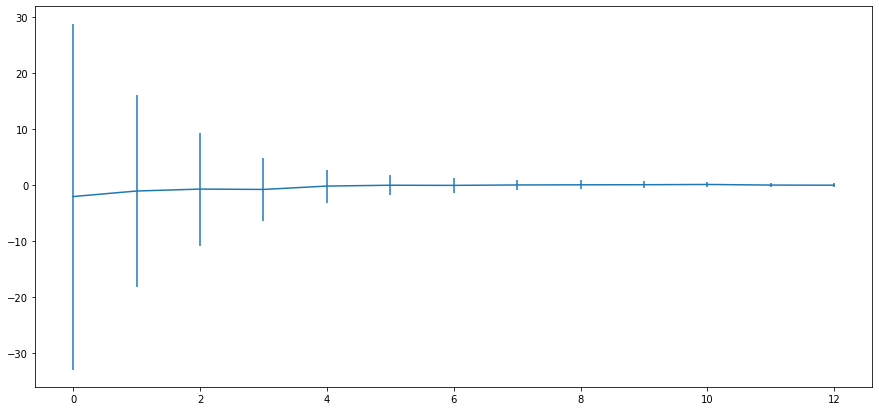

In [287]:
plt.errorbar(range(len(pop_mean)),pop_mean, pop_std)

In [124]:
pop_search_space = np.linspace(30, 100, 40)
std_search_space = np.linspace(1, 50, 60)
pops, stds = np.meshgrid(pop_search_space, std_search_space)
times = np.zeros_like(pops)
convergence = np.zeros_like(pops)

In [125]:
pops.shape

(60, 40)

In [208]:
search_range = (-100, 100)
dim = 1
runs = 20
keep_n = lambda pop: len(pop) //4


for i in tqdm(range(len(pops))):
    for j in range(len(pops[i])):
        sigma = stds[i][j]
        p0_size = int(pops[i][j])
        tt = 0
        c = 0
        for _ in range(runs):
#             pop_avg, _, _, t = fixed_population_fixed_std(search_range, dim, p0_size, sigma, spikey_parabola)
#             pop_avg, _, _, t = geom_population_fixed_std(search_range, dim, p0_size, keep_n, sigma, parabola)
            pop_avg, _, _, t = linear_population_fixed_std(search_range, dim, p0_size, keep_n_linear, sigma, parabola)

            c += (0 - np.mean(pop_avg[-5:]))**2
            tt += t
        
        times[i, j] = tt/runs
        convergence[i, j] = float(c/runs)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [02:23<00:00,  2.39s/it]


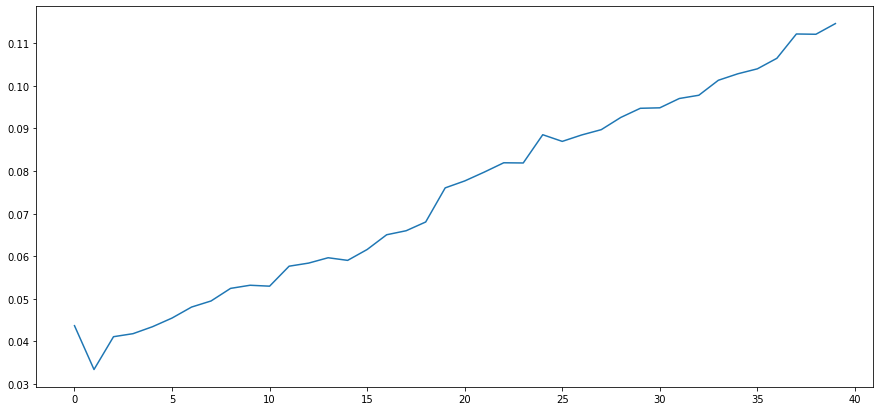

In [176]:
plt.plot(np.sum(times, axis=-2))

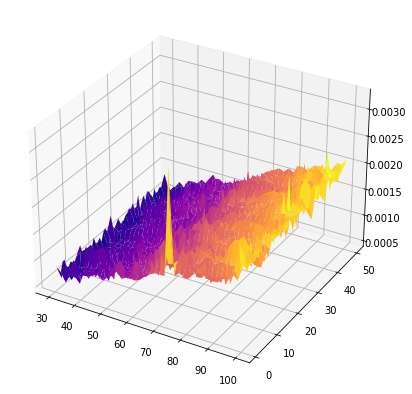

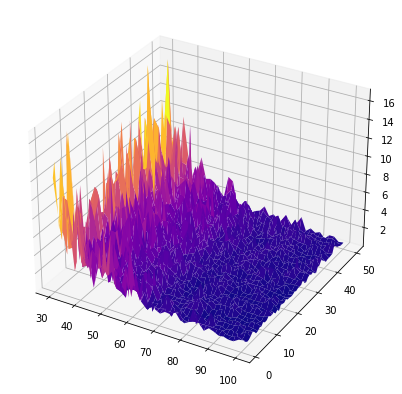

In [177]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(pops, stds, times, cmap='plasma')
plt.show()
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(pops, stds, convergence, cmap='plasma')

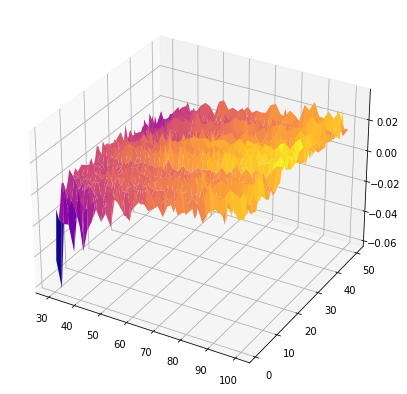

In [290]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(pops, stds, times-.001*convergence, cmap='plasma')
plt.show()


In [287]:
[np.mean(f) for f in pop]

NameError: name 'pop' is not defined

In [82]:
[np.mean(f) for f in fitness]

[-10.969768929329994,
 -11.637020506135247,
 -12.686849169295904,
 -13.69035309179716,
 -14.69391718432765,
 -14.97925579003434,
 -15.40595915743836,
 -15.597989174180523,
 -16.127217578616897,
 -17.396347540456,
 -18.18475405943242,
 -19.72268155270593,
 -21.435252500466216,
 -22.53060191910719,
 -23.18291791446755,
 -24.20552198747361,
 -24.945977562642533,
 -25.604422272051778,
 -26.137200201544353,
 -27.37557468092971,
 -28.461350746580727,
 -30.245609944842123,
 -31.289440290723768,
 -32.53126766285608,
 -33.265352151751344,
 -34.261612372184246,
 -35.66647386396879,
 -36.72007153191657,
 -37.478615455987516,
 -39.15900415048814,
 -40.04775802767293,
 -40.80582737595539,
 -41.79425626142403,
 -42.861460719340734,
 -43.72266396445821,
 -44.950339667835436,
 -46.40269448526873,
 -48.6930819331289,
 -49.7766653174432,
 -50.49229590133384,
 -51.024383997339235,
 -53.27429172058059,
 -54.005785008115275,
 -54.52401806907942,
 -55.37909378111156,
 -56.892743185182916,
 -58.4242386197015

In [6]:
def tester_find0(p):
    print(type(p[0]))
    return [m.eval(10) for m in p]

In [32]:
class basic_model(model):
    # find x
    init_range = (-10, 10)
    variance = 1
    birthRate = 5
    
        
    def __init__(self, x = None):
        self.x = x if x else random.uniform(*self.init_range)

    def params(self):
        return self.x
    
    def eval(self, target):
        return (target - self.x)**2, _
    
    def spawn(self):
        return [basic_model(self.x + random.gauss(0,self.variance)) for i in range(self.birthRate)]

In [33]:
p0 = [basic_model() for i in range(2)]
res = experiment(spawner, 10, selector_10, p0)

In [35]:
res

([[0.007834216792525082, 40.271867111503326],
  [1.0762636744468101,
   1.6827452147757167,
   0.6100660380336586,
   0.5895483307463724,
   0.00584762732562785,
   30.69720510927988,
   27.97238511523443,
   20.327589562493795,
   46.55435346549999,
   44.7173064572101],
  [0.6483309376943801,
   0.0736441322265556,
   0.8082927365054097,
   0.10886585872234283,
   0.8360005030725624,
   0.5360664515185223,
   0.10653138997262455,
   0.9695692658622549,
   0.7202586176045829,
   0.771927774395714,
   0.4905755403852559,
   0.3360116960151609,
   0.016132997161958443,
   0.4372653987766331,
   4.554166373814552,
   0.14808100650343864,
   1.3793040363665159,
   0.7260494330231477,
   1.577597083136792,
   0.004433548755057461,
   5.776397208989097,
   1.739846474317046,
   2.000842925549907,
   0.5792730502939657,
   0.778427482308056,
   38.49476309814267,
   15.036066144474185,
   25.65330563706136,
   29.119863688026452,
   43.63052111037333,
   28.117046539044786,
   23.08179058182

C:\Python39\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
C:\Python39\lib\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: x and y must be the same size

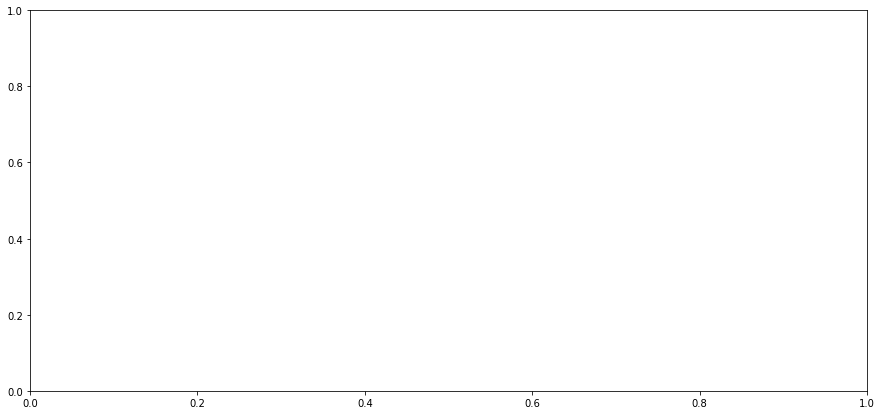

In [34]:
plt.scatter( range(10), [np.mean(x) for x in res])
plt.errorbar(range(10), [np.mean(x) for x in res], [np.std(x) for x in res])

In [11]:
scrs = [5,6,2,46,41,568]
f = ["t" , "gr3", "5f", "6fds", "fsa", "csf"]
# ii = np.argsort(scrs)
# ii
sorted(zip(scrs, f))

[(2, '5f'), (5, 't'), (6, 'gr3'), (41, 'fsa'), (46, '6fds'), (568, 'csf')]

In [12]:
class funcMin_model(model):
    # find x
    def __init__(self, x = None):
        self.x = x if x else random.uniform(-100, 100)
        self.variance = 1
        self.birthRate = 5
        
    def eval(self, target_func):
        return target_func(self.x)
    
    def spawn(self):
        return [funcMin_model(self.x + random.gauss(0,self.variance)) for i in range(self.birthRate)]
    def params(self):
        return self.x

In [13]:
def func_tester(p):
    return [m.eval(f3) for m in p]

In [14]:
p0 = [funcMin_model() for i in range(5)]
gen_scores, gen_params, gen_t = experiment(spawner, func_tester, selector_10, p0, max_generations = 30)

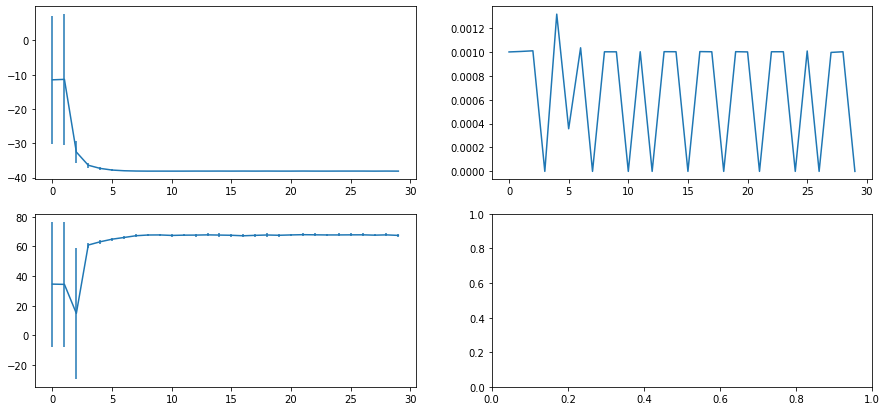

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.figsize(20, 20)
axes[0][0].errorbar(range(len(gen_t)), [np.mean(x) for x in gen_scores], [np.std(x) for x in gen_scores])
axes[1][0].errorbar(range(len(gen_t)), [np.mean(x) for x in gen_params], [np.std(x) for x in gen_params])
axes[0][1].plot(range(len(gen_t)), gen_t)
plt.show()

# Neural Net genetic algo

In [9]:
import tensorflow.keras as tk
from tensorflow.keras.utils import to_categorical


KeyboardInterrupt: 

In [ ]:
def load_fashion_mnist_target_sets():
    fashion_mnist = tk.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#     class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
#                             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
    
    train_images = train_images.reshape((60000, 28, 28, 1))
    train_images = train_images.astype('float32') / 255

    test_images = test_images.reshape((10000, 28, 28, 1))
    test_images = test_images.astype('float32') / 255
    
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    target_sets = train_images, train_labels, test_images, test_labels
    return target_sets

In [ ]:
target_sets = load_fashion_mnist_target_sets()
train_images, train_labels, test_images, test_labels = target_sets

In [ ]:
# fig=plt.figure(figsize=(7,7))
# for i in range(10):
#     fig.add_subplot(4,3,i+1)
#     idx = np.random.choice(np.where(train_labels==i)[0])
#     plt.imshow(train_images[idx,:,:], cmap='gray')
#     plt.axis('off')
#     plt.title(class_names[i])

In [ ]:
class nn_model(model):
    # find x
    epochs = 2
    steps_per_epoch = 90
    num_children = 2
    variance = 5
    birthRate = 2
    
    def __init__(self, layer_ws = None):
        self.inner_model = tk.models.Sequential([
            tk.layers.Flatten(input_shape=(28,28,1)), 
            tk.layers.Dense(128, activation='relu'), # alternatively you could use activation=tf.nn.relu
            tk.layers.Dense(10, activation='softmax')
        ])
        
        if layer_ws:
            for layer, layer_w in zip(self.inner_model.layers, layer_ws):
                layer.set_weights(layer_w)
                
#             print("spawn not implemented")
            
#         self.inner_model.summary()
        self.inner_model.compile(loss='categorical_crossentropy',
              optimizer=tk.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
        
        
    def eval(self, target_sets):
        train_images, train_labels, test_images, test_labels = target_sets
#         self.inner_model.fit(train_images, train_labels,
#             batch_size=100,
#             epochs=self.epochs,
#             steps_per_epoch=self.steps_per_epoch,
#             verbose=0)
        loss, acc = self.inner_model.evaluate(test_images, test_labels, verbose = 0)
        return (loss, acc)
    
    def spawn(self, mate):
        mate_layers = mate.params()
        local_layers = self.params()
        ans = []

        for i in range(self.num_children):
        # randomized
            combined_layers = \
            [[w1s + w2s + random.gauss(0,self.variance) for w1s, w2s in zip(w1, w2)] for w1, w2 in zip(mate_layers, local_layers)]
            ans += [nn_model(combined_layers)]
        return ans
    
    def params(self):
        return [layer.get_weights() for layer in self.inner_model.layers]

In [ ]:
# Base line
# nm = nn_model()
# nm.inner_model.fit(train_images, train_labels,
#     batch_size=100,
#     epochs=20,
#     steps_per_epoch=nm.steps_per_epoch,
#     verbose=1)
# nm.eval(target_sets)

In [ ]:
p0 = [nn_model() for i in range(12)]
gen_losses, gen_acces, gen_t = light_experiment(matched_spawner, target_sets, selector_10, p0, max_generations = 30)

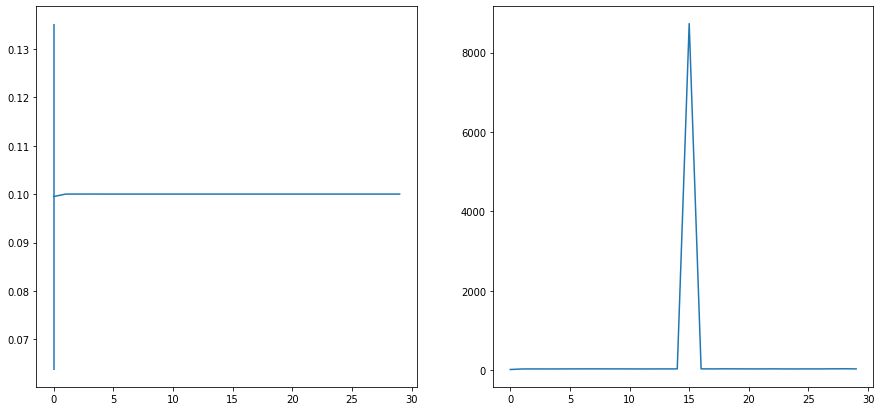

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)
# fig.figsize(20, 20)
axes[0].errorbar(range(len(gen_acces)), [np.mean(x) for x in gen_acces], [np.std(x) for x in gen_acces])
axes[1].plot(range(len(gen_t)), [np.mean(x) for x in gen_t])
plt.show()

In [14]:
gen_losses

[[2.5067505836486816,
  2.387268543243408,
  2.4896655082702637,
  2.4146523475646973,
  2.366990804672241,
  2.532466173171997,
  2.367886543273926,
  2.452869415283203,
  2.40392804145813,
  2.3532283306121826,
  2.3419487476348877,
  2.4654879570007324],
 [5410.59765625,
  2.30259108543396,
  1359.6800537109375,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  1544.509033203125,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  1194.3494873046875],
 [2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  785.2660522460938,
  2.30259108543396,
  10969.7900390625,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  3724.49365234375,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396

In [12]:
sorted(zip([1,5,2,3], [4, 1, '&', []]))[:10]

[(1, 4), (2, '&'), (3, []), (5, 1)]

In [11]:
np.argsort([0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10239999741315842, 0.10000000149011612])

array([ 0, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1, 19, 18], dtype=int64)

In [10]:
ii = np.argsort([1,5,2,4])
ii

array([0, 2, 3, 1], dtype=int64)

In [13]:
a = [4, [], 's', 2]
a = np.array(a)
a[ii]

<ipython-input-13-dc920e4b4172>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(a)


array([4, 's', 2, list([])], dtype=object)